Using classification to predict if a patient has diabetes from patient biomarkers
=================================================================================

The aim of this report is to generate a model capable of classifying a patient into either 'has diabetes' or 'does not have diabetes' based on feature data that will consist of biomarkers. This is a binary classification problem as there are only two possible outcomes. With the data that we have we know what the patients actual diabetes status was, therefore we can use a supervised learning approach to create a model. As this is a medical application the understanding of how well this model performs is very important. We are interested not only how well the model performs on the data used to train it but also unseen data.

Supervised Learning with a decision tree
----------------------------------------

The aim of supervised learning is to learn a function $\phi$ that maps input data $\mathcal{D}$ where $\mathcal{D} = {(x_1,y_1),\dots,(x_k,y_k)}$ and $x_1$ is the input data and $y_1$ is the label.

A decision tree algorithm generates a tree that describes the attributes and how they impact a target class field. This provides a way for stakeholders to see exactly what is happening and can be used to apply and enhance business decisions. The tree structure is used by calculating information gain of different criteria in a recursive fashion. The root node shows the most significant influencing factor. Specifically, a decision tree algorithm forms a tree by analysing all the features and seeing which split of these features provides the most information gain with respect to the target. One method to calculate information gain is with the entropy calculation. This will return a value from 0 to 1 where 0 represents there was no good split and 1 represents where there was a perfect 50% split between the 2 classes. The split with the greatest information gain will be used as the root node of the tree, and then this process is repeated for the following nodes of the tree.

**Hyperparameters:**

*   Criterion
*   Depth
*   Sample Split
*   Cost Complexity Pruning Alpha

**Advantages:**

*   Easily understandable decision steps
*   Works with collinear data
*   Can be used with categorical and numerical data using methods such as one-hot-encoding

**Disadvantages:**

*   The model can fall into the overfitting problem, meaning that the tree is too deep and is accounting for some special cases. This can be mitigated with pruning where branches that do not increase the accuracy of the model are removed.
*   Decision trees do not usually give the best accuracy, however with tuning their accuracy can get close to that of neural networks

A decision tree is particually beneficial here for predicting diabetes, as this is a medical application the accuracy of this model can have real life consequences. The model produced by a decision tree can be represented as a diagram that can be easily understood by experts in the field and can be sanity checked. The model iteself can also produce useful insights to experts

### Predictions with Decision Trees

Once a decision tree has been fit to some training data, a target can be predicted from inputted feature variable values. From these input values the decision tree is followed starting from the route node unit a leaf is reached.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

/var/folders/yw/qmvvfjd916v9cr0f447rhf700000gp/T/ipykernel_45761/484212035.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


The Data
--------

The public diabetes dataset is available from Kaggle here https://www.kaggle.com/datasets/prosperchuks/health-dataset. This dataset, originally from the BRFSS 2015 Dataset, contains health information about patients age 18 and over and whether or not they have diabetes. This dataset is from survey responses of over 250000 people. The cleaned version has balanced classes.

### Exploration

Below I have conducted some exploratory analysis on the data to understand its structure and the data types along with their distribution.

In [2]:
df = pd.read_csv('data/diabetes_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
# Converting relevant columns from float to int 
conv_columns = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
df[conv_columns] = df[conv_columns].astype(int)

We can see here that this dataset contains 17 features and 1 label variable. It can also be seen that there are 70692 rows or samples in the dataset for each variable. Each row represents a patient. 

In [4]:
def explore_col(col_name):
    print("Mean: {}".format(df[col_name].mean()))
    print("Distinct Values: {}".format(df[col_name].nunique()))
    print("Minimum Value: {}".format(df[col_name].min()))
    print("Maximum Value: {}".format(df[col_name].max()))

### Age

Continuous Variable. 13 Level age category. e.g. 1 represents people age 18-24

Mean: 8.584054772817291
Distinct Values: 13
Minimum Value: 1
Maximum Value: 13


<AxesSubplot:xlabel='Age', ylabel='Density'>

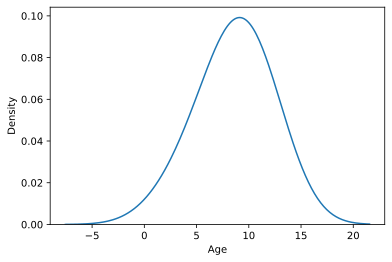

In [5]:
explore_col("Age")
sns.kdeplot(data=df, x="Age", bw_method=1)

### Sex

Binary Variable. Evenly Distributed 1 = Male 0 = Female

Mean: 0.4569965484071748
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

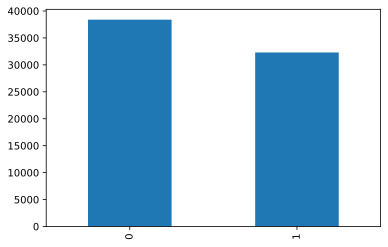

In [6]:
explore_col("Sex")
df['Sex'].value_counts().plot(kind='bar')

### HighChol

Binary Variable. Evenly Distributed 0 = No high cholesterol 1 = High cholesterol

Mean: 0.5257030498500538
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

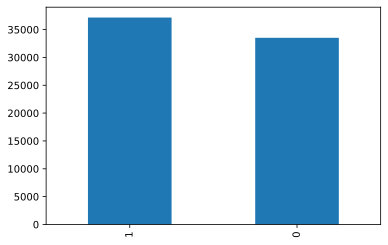

In [7]:
explore_col("HighChol")
df['HighChol'].value_counts().plot(kind='bar')

### CholCheck

Binary Variable. Not evenly distributed. 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

Mean: 0.975258869461891
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

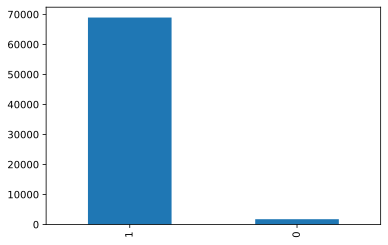

In [8]:
explore_col("CholCheck")
df['CholCheck'].value_counts().plot(kind='bar')

### BMI

Continuous Variable. Normally distributed. Represents the body mass index

Mean: 29.856985231709388
Distinct Values: 80
Minimum Value: 12.0
Maximum Value: 98.0


<AxesSubplot:xlabel='BMI', ylabel='Density'>

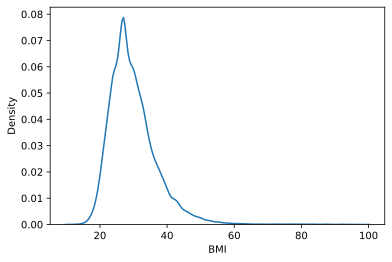

In [9]:
explore_col("BMI")
sns.kdeplot(data=df, x="BMI")

### Smoker

Binary Variable. Evenly distributed. Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes

Mean: 0.4752730153341255
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

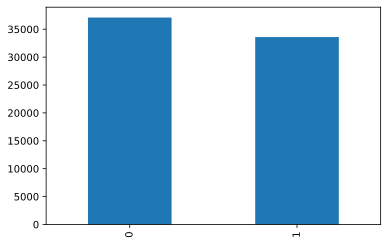

In [10]:
explore_col("Smoker")
df['Smoker'].value_counts().plot(kind='bar')

### HeartDiseaseorAttack

Binary Variable. Not evenly distributed. Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

Mean: 0.1478102189781022
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

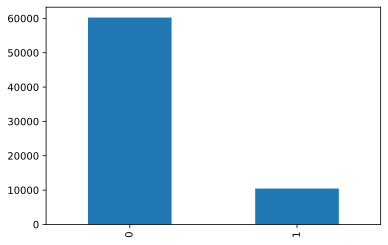

In [11]:
explore_col("HeartDiseaseorAttack")
df['HeartDiseaseorAttack'].value_counts().plot(kind='bar')

### PhysActivity

Binary Variable. Not evenly distributed. Physical activity in past 30 days - not including job 0 = no 1 = yes

Mean: 0.7030357041815198
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

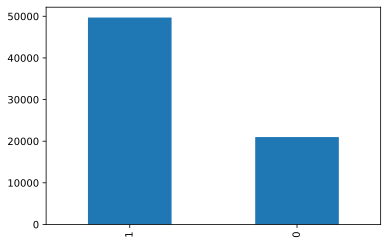

In [12]:
explore_col("PhysActivity")
df['PhysActivity'].value_counts().plot(kind='bar')

### Fruits

Binary Variable. Not evenly distributed. Consume Fruit 1 or more times per day 0 = no 1 = yes

Mean: 0.611794828269111
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

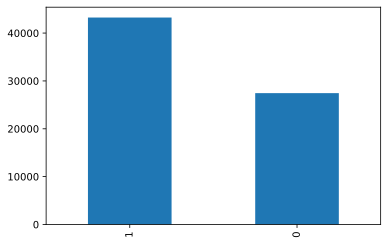

In [13]:
explore_col("Fruits")
df['Fruits'].value_counts().plot(kind='bar')

### Veggies

Binary Variable. Not evenly distributed. Consume Vegetables 1 or more times per day 0 = no 1 = yes

Mean: 0.788773835794715
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

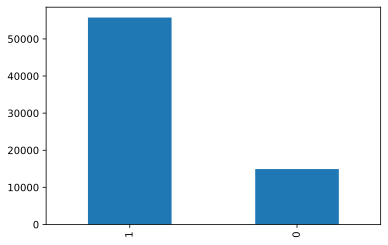

In [14]:
explore_col("Veggies")
df['Veggies'].value_counts().plot(kind='bar')

### HvyAlcoholConsump

Binary Variable. Not evenly distributed. (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

Mean: 0.04272053414813557
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

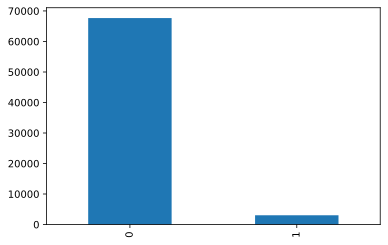

In [15]:
explore_col("HvyAlcoholConsump")
df['HvyAlcoholConsump'].value_counts().plot(kind='bar')

### GenHlth

Categorical Variable. Not evenly distributed. Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

Mean: 2.837081989475471
Distinct Values: 5
Minimum Value: 1
Maximum Value: 5


<AxesSubplot:>

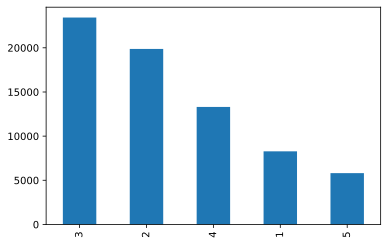

In [16]:
explore_col("GenHlth")
df['GenHlth'].value_counts().plot(kind='bar')

### MentHlth

Categorical Variable. Not evenly distributed. Days of poor mental health scale 1-30 days

Mean: 3.7520370056017653
Distinct Values: 31
Minimum Value: 0
Maximum Value: 30


<AxesSubplot:xlabel='MentHlth', ylabel='Density'>

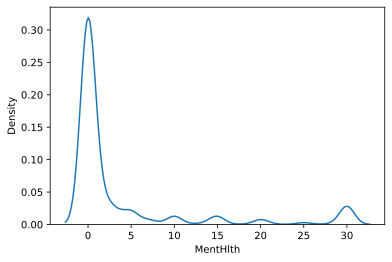

In [17]:
explore_col("MentHlth")
sns.kdeplot(data=df, x="MentHlth")

### PhysHlth

Categorical Variable. Not evenly distributed. Physical illness or injury days in past 30 days scale 1-30

Mean: 5.810417020313473
Distinct Values: 31
Minimum Value: 0
Maximum Value: 30


<AxesSubplot:xlabel='PhysHlth', ylabel='Density'>

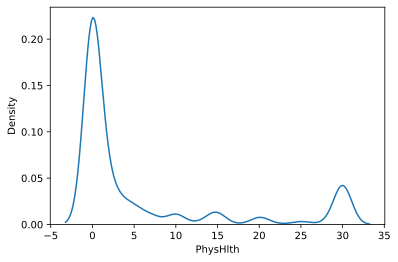

In [18]:
explore_col("PhysHlth")
sns.kdeplot(data=df, x="PhysHlth")

### DiffWalk

Binary Variable. Not evenly distributed. Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Mean: 0.25273015334125504
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

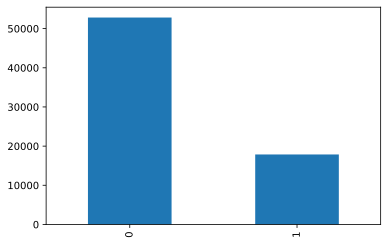

In [19]:
explore_col("DiffWalk")
df['DiffWalk'].value_counts().plot(kind='bar')

### Stroke

Binary Variable. Not evenly distributed. Have you ever had a stroke. 0 = no, 1 = yes

Mean: 0.0621711084705483
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

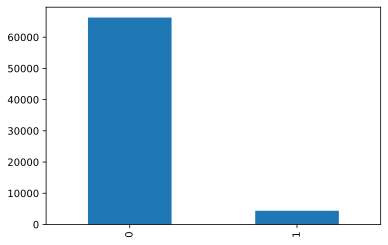

In [20]:
explore_col("Stroke")
df['Stroke'].value_counts().plot(kind='bar')

### HighBP

Binary Variable. Fairly evenly distributed. 0 = no high, BP 1 = high BP

Mean: 0.5634583828438862
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

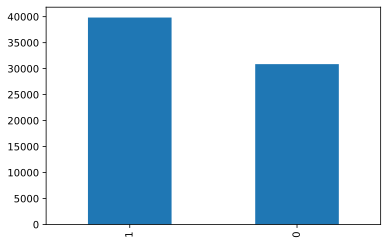

In [21]:
explore_col("HighBP")
df['HighBP'].value_counts().plot(kind='bar')

### Diabetes

Binary Variable. Evenly distributed. 0 = no diabetes, 1 = diabetes

Mean: 0.5
Distinct Values: 2
Minimum Value: 0
Maximum Value: 1


<AxesSubplot:>

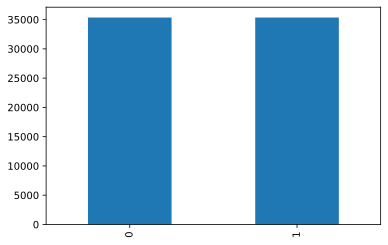

In [22]:
explore_col("Diabetes")
df['Diabetes'].value_counts().plot(kind='bar')

### Correlation Plot

Here we can see how the different biomarkers are correlated.

<AxesSubplot:>

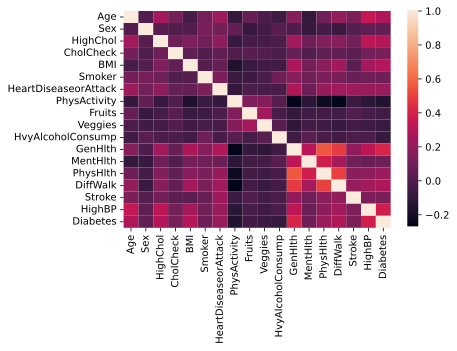

In [23]:
cormat = df.corr()
sns.heatmap(cormat)